In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as data
import torch
from torch.autograd import Variable

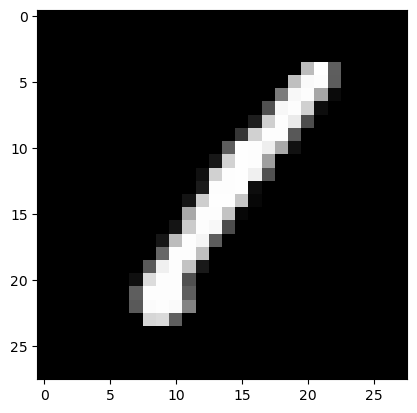

In [2]:
df = pd.read_csv("train.csv")
plt.imshow(np.reshape(df.values[0][1:],(28,28)), cmap=plt.get_cmap('gray'))
plt.show()

In [11]:
train = pd.read_csv('train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train.shape, len(train)

((1000, 785), 1000)

In [13]:
train_labels = train['label'].values
train_labels[:10]

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3])

In [14]:
train = train.drop(labels='label',axis=1).values.reshape(len(train),1,28,28)
train

array([[[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       ...,


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]],


       [[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 

In [16]:
train.shape # number of training samples, no of channels

(1000, 1, 28, 28)

In [17]:
X = torch.Tensor(train.astype(float)) # features must be floats in order for PyTorch to be able to compute gradients
y = torch.Tensor(train_labels).long()
# our labels must be integers within this classification model (as we're trying to predict values of 1, 2, 3, and so on)

In [18]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [19]:
y

tensor([1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5, 8, 6, 2, 0,
        2, 3, 6, 9, 9, 7, 8, 9, 4, 9, 2, 1, 3, 1, 1, 4, 9, 1, 4, 4, 2, 6, 3, 7,
        7, 4, 7, 5, 1, 9, 0, 2, 2, 3, 9, 1, 1, 1, 5, 0, 6, 3, 4, 8, 1, 0, 3, 9,
        6, 2, 6, 4, 7, 1, 4, 1, 5, 4, 8, 9, 2, 9, 9, 8, 9, 6, 3, 6, 4, 6, 2, 9,
        1, 2, 0, 5, 9, 2, 7, 7, 2, 8, 8, 5, 0, 6, 0, 0, 2, 9, 0, 4, 7, 7, 1, 5,
        7, 9, 4, 6, 1, 5, 7, 6, 5, 0, 4, 8, 7, 6, 1, 8, 7, 3, 7, 3, 1, 0, 3, 4,
        5, 4, 0, 5, 4, 0, 3, 5, 1, 0, 8, 3, 7, 0, 9, 6, 6, 9, 5, 4, 6, 9, 3, 5,
        4, 2, 4, 8, 7, 7, 5, 8, 8, 8, 2, 6, 9, 3, 1, 0, 4, 1, 5, 9, 0, 6, 2, 1,
        3, 0, 6, 0, 0, 8, 3, 2, 0, 0, 6, 0, 0, 4, 7, 2, 7, 1, 9, 9, 3, 9, 8, 4,
        6, 6, 5, 3, 8, 1, 8, 7, 1, 3, 7, 6, 3, 6, 3, 6, 3, 2, 3, 2, 2, 7, 9, 2,
        3, 2, 7, 5, 5, 8, 8, 2, 0, 1, 4, 0, 6, 3, 7, 1, 1, 1, 4, 7, 0, 2, 9, 2,
        0, 5, 6, 0, 8, 9, 6, 2, 0, 0, 7, 2, 0, 4, 2, 0, 9, 1, 6, 9, 3, 0, 0, 2,
        0, 6, 8, 4, 0, 7, 2, 1, 9, 5, 2,

In [22]:
X.view(X.shape[0],-1).shape

torch.Size([1000, 784])

Building the classifier model

In [5]:
class MNISTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 392)
        self.fc2 = nn.Linear(392, 196)
        self.fc3 = nn.Linear(196, 98)
        self.fc4 = nn.Linear(98, 10)
        
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1) # converts (1000,1,28,28) -> (1000,784)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [6]:
model = MNISTClassifier()
loss_function = nn.NLLLoss()
opt = optim.Adam(model.parameters(), lr=0.001)

In [7]:
for epoch in range(50):
    
    images = Variable(X)
    labels = Variable(y)

    opt.zero_grad()
    outputs = model(images)

    loss = loss_function(outputs, labels)
    loss.backward()
    opt.step()

    print ('Epoch [%d/%d] Loss: %.4f' %(epoch+1, 50, loss.data.item()))

Epoch [1/50] Loss: 9.7278
Epoch [2/50] Loss: 6.6400
Epoch [3/50] Loss: 4.6651
Epoch [4/50] Loss: 3.4805
Epoch [5/50] Loss: 2.7262
Epoch [6/50] Loss: 2.2012
Epoch [7/50] Loss: 1.8593
Epoch [8/50] Loss: 1.6096
Epoch [9/50] Loss: 1.5178
Epoch [10/50] Loss: 1.4207
Epoch [11/50] Loss: 1.2427
Epoch [12/50] Loss: 1.2212
Epoch [13/50] Loss: 1.0953
Epoch [14/50] Loss: 1.0116
Epoch [15/50] Loss: 0.9173
Epoch [16/50] Loss: 0.9390
Epoch [17/50] Loss: 0.8067
Epoch [18/50] Loss: 0.7979
Epoch [19/50] Loss: 0.7348
Epoch [20/50] Loss: 0.6925
Epoch [21/50] Loss: 0.6502
Epoch [22/50] Loss: 0.5975
Epoch [23/50] Loss: 0.5862
Epoch [24/50] Loss: 0.5186
Epoch [25/50] Loss: 0.4924
Epoch [26/50] Loss: 0.4413
Epoch [27/50] Loss: 0.4688
Epoch [28/50] Loss: 0.4515
Epoch [29/50] Loss: 0.4295
Epoch [30/50] Loss: 0.4052
Epoch [31/50] Loss: 0.3411
Epoch [32/50] Loss: 0.3444
Epoch [33/50] Loss: 0.3537
Epoch [34/50] Loss: 0.3116
Epoch [35/50] Loss: 0.2853
Epoch [36/50] Loss: 0.2998
Epoch [37/50] Loss: 0.2419
Epoch [38/

In [319]:
test = pd.read_csv("test.csv")
test_labels = test['label'].values
test = test.drop("label",axis=1).values.reshape(len(test),1,28,28)

X_test = torch.Tensor(test.astype(float))
y_test = torch.Tensor(test_labels).long()

In [320]:
preds = model(X_test)

In [321]:
print(preds[0])

tensor([-5.8550, -6.8315, -7.0251, -7.9013, -4.3035, -6.1763, -6.9913, -6.0805,
        -5.7120, -0.0277], grad_fn=<SelectBackward>)


In [322]:
_, predictionlabel = torch.max(preds.data, 1)
predictionlabel = predictionlabel.tolist()

predictionlabel = pd.Series(predictionlabel)
test_labels = pd.Series(test_labels)

pred_table = pd.concat([predictionlabel, test_labels], axis=1)
pred_table.columns =['Predicted Value', 'True Value']

display(pred_table.head())

,Predicted Value,True Value
0,9,9
1,8,5
2,2,2
3,4,4
4,1,1


In [323]:
preds = len(predictionlabel)
correct = len([1 for x,y in zip(predictionlabel, test_labels) if x==y])
print((correct/preds)*100)

89.5
